Alejandro Alquezar Pitarch - Proyecto universitario

# LAB: Análisis descriptivo y exploratorio de datos

Primero que todo comenzamos importando los paquetes que vamos a utilizar en este laboratorio y cargamos los datos de nuestro archivo csv al DataFrame.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/Alejandro/Downloads/Actividad 1/Actividad 1/cancer.csv")

### Caracterización de las distribuciones

In [4]:
frec_relativa = df['Uniformity of Cell Size'].value_counts(normalize = True)
print(frec_relativa)

Uniformity of Cell Size
1     0.546120
10    0.098097
3     0.076135
2     0.065886
4     0.055637
5     0.043924
8     0.040996
6     0.036603
7     0.027818
9     0.008785
Name: proportion, dtype: float64


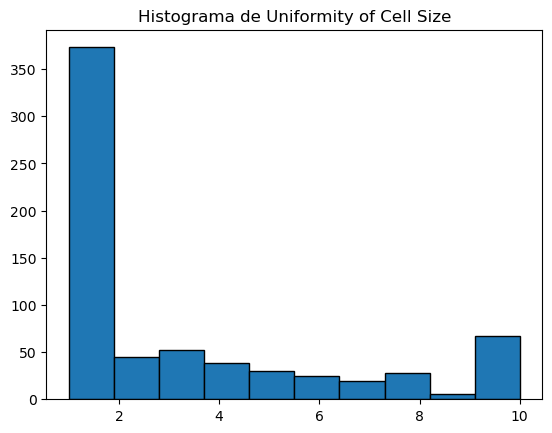

In [14]:
plt.hist(df['Uniformity of Cell Size'], bins = 10, edgecolor = 'black')
plt.title("Histograma de Uniformity of Cell Size")
plt.show()

In [6]:
media = df['Uniformity of Cell Size'].mean()
mediana = df['Uniformity of Cell Size'].median()
moda = df['Uniformity of Cell Size'].mode()[0]
print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)

Media: 3.150805270863836
Mediana: 1.0
Moda: 1


In [7]:
## Coeficiente de asimetria. Si coe > 0: Asimetria positiva; Si coe > 0: Asimetria negativa; Si coe = 0: Perfectamente simetrica.
coe_as = df['Uniformity of Cell Size'].skew()
print("Coeficiente de asimetría:", coe_as)

Coeficiente de asimetría: 1.226404095656918


Al hallar la frecuencia relativa podemos observar como casi el 55% de nuestros datos tiene como valor de 'Uniformity of Cell Size' uno. 
Analizando el histograma podemos ver como la distribución **no** será simétrica y, por tanto, analizando los valores de media, mediana, moda y el coeficiente de asimetria obtenemos que la distribución es **asimétrica positiva**. 

Para obtener este resultado nos basamos en que la simetria suele ser positiva en los casos donde la moda suele ser menor o igual que la mediana y a su vez esta es menor que la media. También al observar el coeficiente de asimetria, si éste es mayor que 0 indica que es asimetria positiva.

### Medidas de dispersión

In [8]:
varianza = df['Uniformity of Cell Size'].var()
desviacion = df['Uniformity of Cell Size'].std()
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Varianza: 9.395112986951695
Desviación estándar: 3.0651448557860514


Una **varianza** de **9.39511** nos indica que los valores del conjunto de datos están, en promedio, alejados de la media. Mientras que una **desviación estándar** de **3.06514** nos indica que los datos se desvian alrededor de 3.06514 unidades de la media. 

Con estos resultados podemos afirmar que los valores de este conjunto de datos no están extremadamente concentrados alrededor de la media, pero, tampoco están extremadamente dispersos.

### Valores atípicos

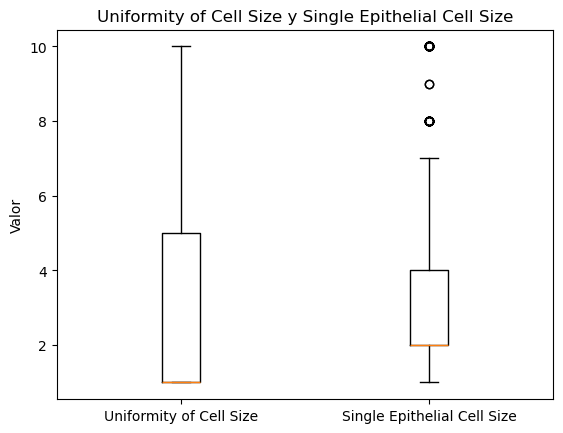

In [13]:
plt.boxplot([df['Uniformity of Cell Size'], df['Single Epithelial Cell Size']], labels = ['Uniformity of Cell Size', 'Single Epithelial Cell Size'])
plt.ylabel("Valor")
plt.title("Uniformity of Cell Size y Single Epithelial Cell Size")
plt.show()

La linea horizontal amarilla nos indica la mediana de los datos. En estos dos casos, podemos ver como la mediana está situada en la parte inferior del rectángulo, lo que nos indica que es relativamente baja con respecto al rango total de datos. La mediana es el valor que separa al conjunto de datos en dos partes iguales, y como hemos visto anteriormente para el caso de la variable "Uniformity of Cell Size" sabemos que el valor 1 tenia mas del 50% de los datos. 

Analizando el diagrama de caja para la primera variable "Uniformity of Cell Size" podemos ver como no tiene bigote inferior, el primer cuartil estaría alrededor de 1, el tercer cuartil sería alrededor de 5 y no tiene valores atípicos. 

En el caso de la segunda variable "Single Epithelial Cell Size" podemos ver como existe tanto bigote inferior como superior que nos indican los valores minimos y maximos no atípicos, observamos también que el primer cuartil tiene un valor de 2 y el tercer cuartil un valor de 4. En este caso si tenemos valores atípicos marcados con circulos, un valor atípico son aquellos que pueden ser extremadamente altos o bajos en relación con el resto de los datos. En este caso tendriamos valores atípicos entre 8 y 10.

### Correlación entre variables

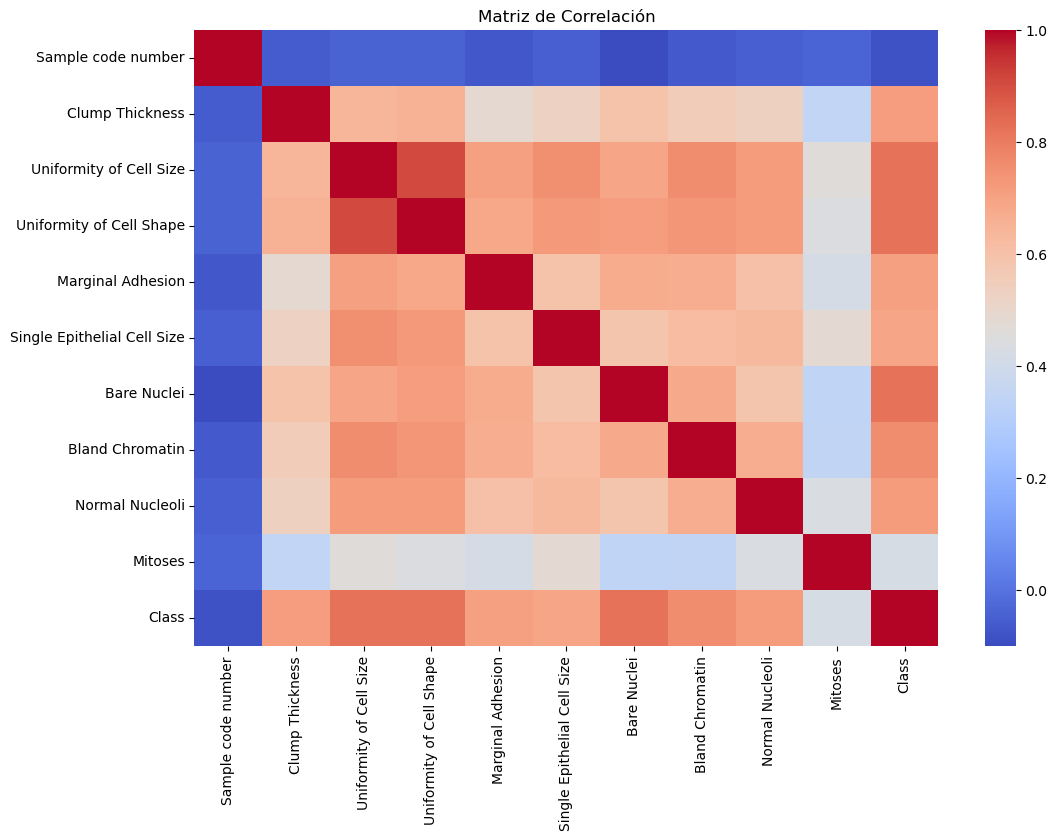

In [5]:
corr_matrix = df.corr()
# Creamos el gráfico de la matriz de correlación con el paquete seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Al observar la matriz de correlación podemos ver como el gráfico de coordenadas paralelas nos indicaba que existe correlación entre la mayoría de las variables de este conjunto de datos.
El punto de correlación más fuerte lo obtenemos entre las variables 'Uniformity of Cell Size' y 'Uniformity of Cell Shape' con un valor alrededor de 0.9, muy cercano a 1. 

Por otro lado, también tenemos correlación positiva entre las variables 'Clump Thickness' y 'Uniformity of Cell Size' con un valor cercano a 0.6
.
Entre las variables 'Uniformity of Cell Shape' y 'Marginal Adhesion' también existe una correlación positiva con un valor cercano a 0.
6.
Entre las variables 'Marginal Adhesion' y 'Single Epithelial Cell Size' también hay una correlación positiva con un valor próximo a 
0.6.
Finalmente, podemos observar, como era esperable, que la variable 'Sample code number' es totalmente independiente y no tiene correlación con ninguna de las otras variables del conjunto de datos.
